In [1]:
!pip install matplotlib
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
sns.set(style='dark')

def get_total_count_by_hour_df(hour_df):
  hour_count_df =  hour_df.groupby(by="hours").agg({"count_cr": ["sum"]})
  return hour_count_df

def count_by_day_df(day_df):
    day_df_count_2011 = day_df.query(str('dteday >= "2011-01-01" and dteday < "2012-12-31"'))
    return day_df_count_2011

def total_registered_df(day_df):
   reg_df =  day_df.groupby(by="dteday").agg({
      "registered": "sum"
    })
   reg_df = reg_df.reset_index()
   reg_df.rename(columns={
        "registered": "register_sum"
    }, inplace=True)
   return reg_df

def total_casual_df(day_df):
   cas_df =  day_df.groupby(by="dteday").agg({
      "casual": ["sum"]
    })
   cas_df = cas_df.reset_index()
   cas_df.rename(columns={
        "casual": "casual_sum"
    }, inplace=True)
   return cas_df

def sum_order (hour_df):
    sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

def macem_season (day_df):
    season_df = day_df.groupby(by="season").count_cr.sum().reset_index()
    return season_df

In [9]:
try:
    days_df = pd.read_csv("day_clean.csv")
    hours_df = pd.read_csv("hour_clean.csv")
except FileNotFoundError:
    st.error("File CSV tidak ditemukan.")
except Exception as e:
    st.error(f"Terjadi kesalahan: {e}")

In [10]:
datetime_columns = ["dteday"]
days_df.sort_values(by="dteday", inplace=True)
days_df.reset_index(inplace=True)

hours_df.sort_values(by="dteday", inplace=True)
hours_df.reset_index(inplace=True)

for column in datetime_columns:
    days_df[column] = pd.to_datetime(days_df[column])
    hours_df[column] = pd.to_datetime(hours_df[column])

min_date_days = days_df["dteday"].min()
max_date_days = days_df["dteday"].max()

min_date_hour = hours_df["dteday"].min()
max_date_hour = hours_df["dteday"].max()


In [11]:
with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/image1_hH9B4gs.jpg")

        # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',
        min_value=min_date_days,
        max_value=max_date_days,
        value=[min_date_days, max_date_days])

main_df_days = days_df[(days_df["dteday"] >= str(start_date)) &
                       (days_df["dteday"] <= str(end_date))]

main_df_hour = hours_df[(hours_df["dteday"] >= str(start_date)) &
                        (hours_df["dteday"] <= str(end_date))]

hour_count_df = get_total_count_by_hour_df(main_df_hour)
day_df_count_2011 = count_by_day_df(main_df_days)
reg_df = total_registered_df(main_df_days)
cas_df = total_casual_df(main_df_days)
sum_order_items_df = sum_order(main_df_hour)
season_df = macem_season(main_df_hour)


In [12]:
#Melengkapi Dashboard dengan Berbagai Visualisasi Data
st.header('Bike Sharing :sparkles:')

st.subheader('Daily Sharing')
col1, col2, col3 = st.columns(3)

with col1:
    total_orders = day_df_count_2011.count_cr.sum()
    st.metric("Total Sharing Bike", value=total_orders)

with col2:
    total_sum = reg_df.register_sum.sum()
    st.metric("Total Registered", value=total_sum)

with col3:
    total_sum = cas_df.casual_sum.sum()
    st.metric("Total Casual", value=total_sum)


<ipython-input-13-901277859c10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-13-901277859c10>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


DeltaGenerator()

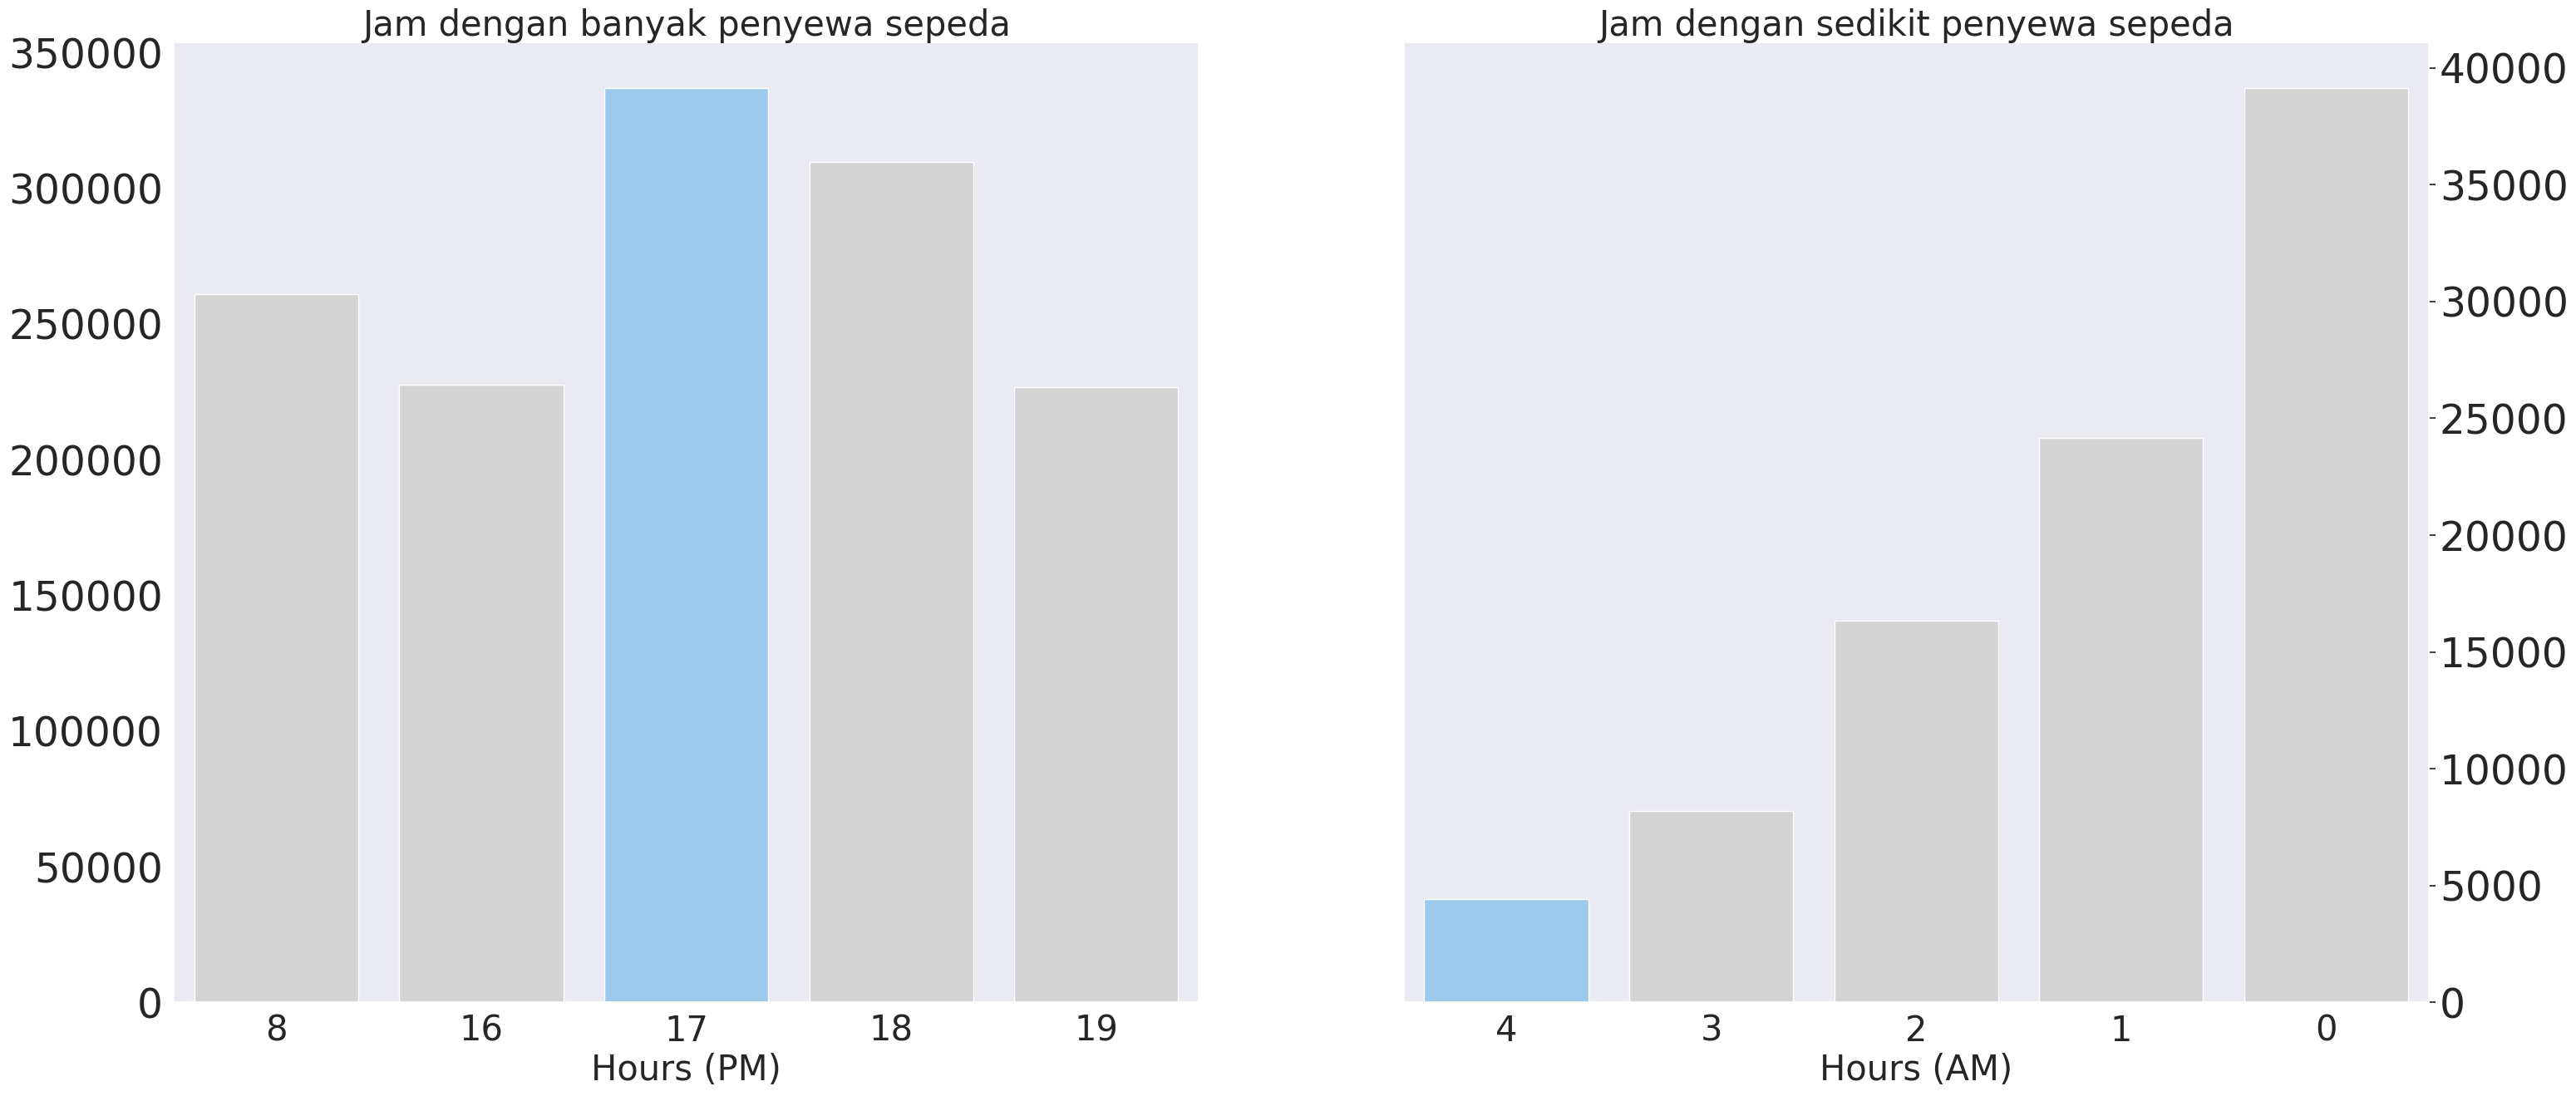

In [13]:
# Plotting
st.subheader("pada jam berapa yang paling banyak dan paling sedikit disewa?")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

st.pyplot(fig)


In [14]:
st.subheader("musim apa yang paling banyak disewa?")

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"]
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y="count_cr",
    x="season",
    data=season_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
st.pyplot(fig)

<ipython-input-14-5f59f477ba69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


DeltaGenerator()